In [2]:
!pip install mlflow


In [3]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge , Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import mlflow


mlflow.start_run()


c:\Users\dell\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\dell\anaconda3\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
c:\Users\dell\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


<ActiveRun: >

In [4]:
df=pd.read_csv("kc_house_data.csv")

In [5]:
print(df.shape)
df.head(10)

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
df.drop(columns=['id','date'],inplace=True)

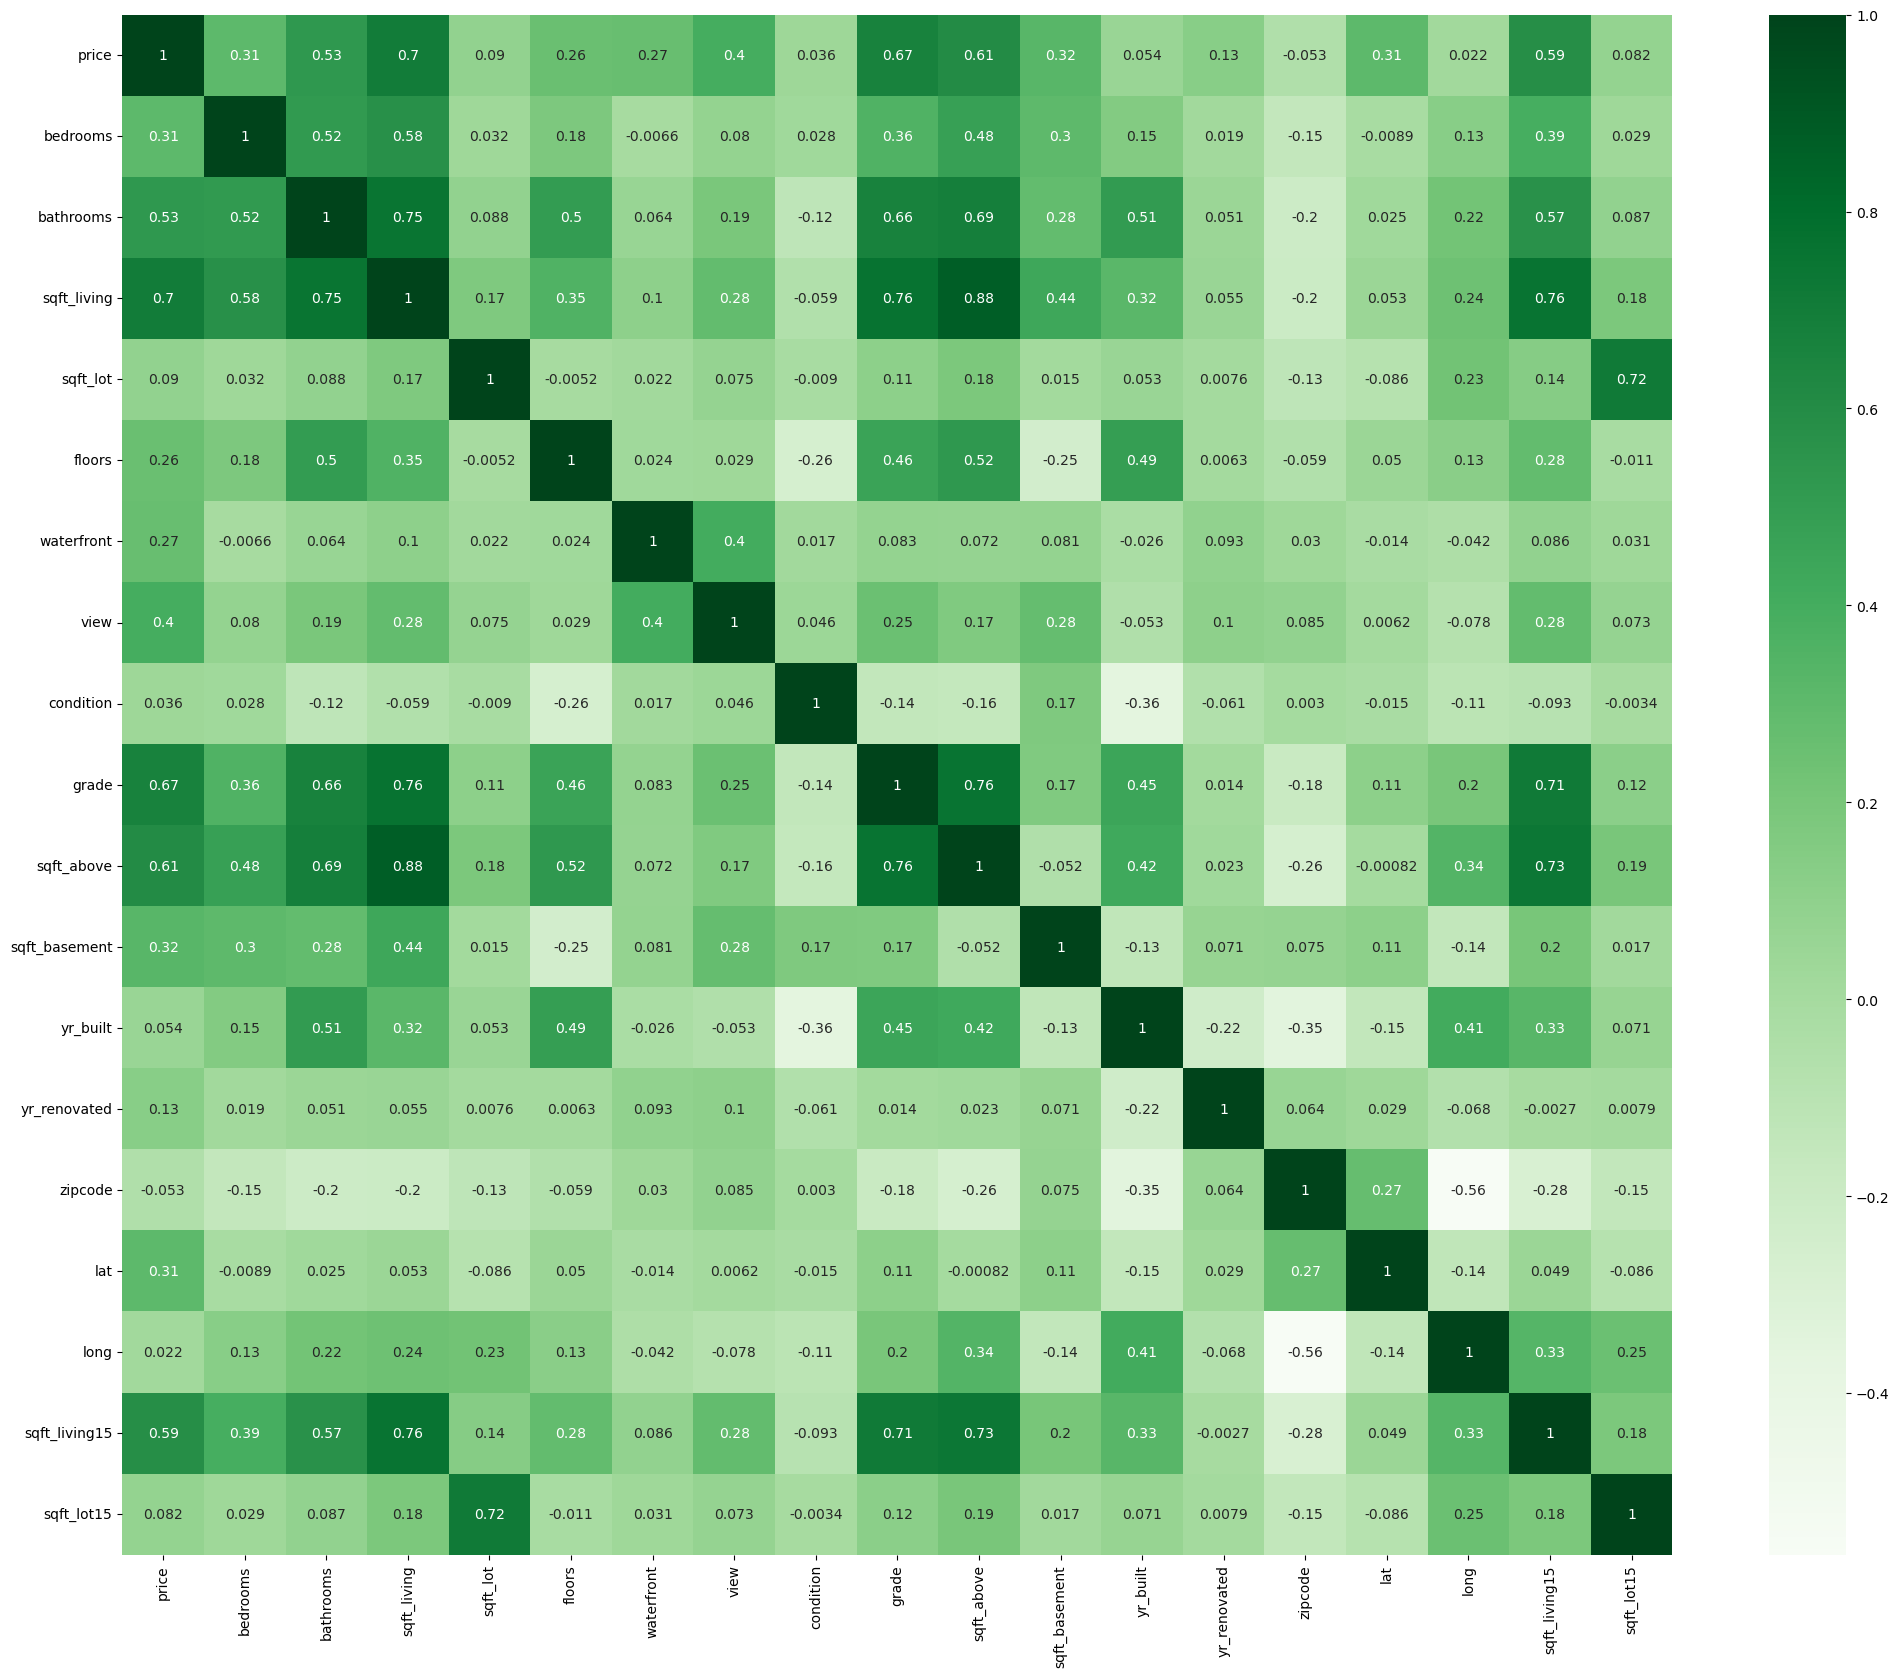

In [8]:
corr = df.corr()

fig , ax = plt.subplots(figsize=(25 , 20))


sns.heatmap(corr ,annot= True , ax=ax , cmap= 'Greens');

In [9]:
X = df.drop(columns=['price','bathrooms','grade','sqft_above','sqft_living15','sqft_lot15'],axis=1)
y = df['price']

In [10]:
X1 = df.drop(columns=['price'])
y1 = df['price']

In [11]:
X_train , X_test , y_train , y_test = train_test_split(X ,y ,test_size=0.2 , random_state=42 )
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (17290, 13)
y_train shape: (17290,)
X_test shape: (4323, 13)
y_test shape: (4323,)


In [12]:
X1_train , X1_test , y1_train , y1_test = train_test_split(X1 ,y1 ,test_size=0.2 , random_state=42 )
print("X1_train shape:", X1_train.shape)
print("y1_train shape:", y1_train.shape)
print("X1_test shape:", X1_test.shape)
print("y1_test shape:", y1_test.shape)

X1_train shape: (17290, 18)
y1_train shape: (17290,)
X1_test shape: (4323, 18)
y1_test shape: (4323,)


In [13]:
y_mean = y_train.mean()
y_pred_baseline= [y_mean] * len(y_train)
print("Mean apt price:", y_mean)

print("Baseline MAE:", mean_absolute_error(y_train,y_pred_baseline))

Mean apt price: 537768.04794679
Baseline MAE: 231680.0768070218


In [14]:
perform = pd.DataFrame(columns=['model','Training Score','Testing Score','MSE','MAE'])
def performance(model,X_train,y_train,y_pred,y_test):
    perform = []
    perform.append(type(model).__name__)
    perform.append(model.score(X_train,y_train))
    perform.append(r2_score(y_test,y_pred))
    perform.append(mean_squared_error(y_test,y_pred))
    perform.append(mean_absolute_error(y_test,y_pred))
    return perform

In [15]:
lr= LinearRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)
perform.loc[len(perform)] = performance(lr,X_train,y_train,lr_pred,y_test)



In [16]:
lo = Lasso(max_iter=2000)
lo.fit(X_train,y_train)
lo_pred = lo.predict(X_test)
perform.loc[len(perform)] = performance(lo,X_train,y_train,lo_pred,y_test)

In [17]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)
perform.loc[len(perform)] = performance(dt,X_train,y_train,dt_pred,y_test)

In [18]:
predictions = dt_pred
mse = mean_squared_error(y_test, predictions)

mlflow.log_param("model", "Lasso")
mlflow.log_metric("mse", mse)

mlflow.sklearn.log_model(lo, "Lasso")


c:\Users\dell\anaconda3\lib\site-packages\_distutils_hack\__init__.py:30: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [19]:
dt1 = DecisionTreeRegressor()
dt1.fit(X1_train,y1_train)
dt1_pred = dt1.predict(X1_test)
perform.loc[len(perform)] = performance(dt1,X1_train,y1_train,dt1_pred,y1_test)

In [20]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
perform.loc[len(perform)] = performance(rf,X_train,y_train,rf_pred,y_test)

In [21]:
rf1 = RandomForestRegressor()
rf1.fit(X1_train,y1_train)
rf1_pred = rf1.predict(X1_test)
perform.loc[len(perform)] = performance(rf1,X1_train,y1_train,rf1_pred,y1_test)

In [22]:
#Decision Tree with feature selection
xgb = XGBRegressor()
xgb.fit(X_train,y_train)
xgb_pred = xgb.predict(X_test)
perform.loc[len(perform)] = performance(xgb,X_train,y_train,xgb_pred,y_test)

In [23]:
#Decision Tree without feature selection
xgb1 = XGBRegressor()
xgb1.fit(X1_train,y1_train)
xgb1_pred = xgb1.predict(X1_test)
perform.loc[len(perform)] = performance(xgb1,X1_train,y1_train,xgb1_pred,y1_test)

In [24]:
display(perform)

,model,Training Score,Testing Score,MSE,MAE
0,LinearRegression,0.661631,0.665151,5.062132e+10,137856.715665
1,Lasso,0.661631,0.665148,5.062186e+10,137856.280850
2,DecisionTreeRegressor,0.999234,0.680639,4.827991e+10,107900.395327
3,DecisionTreeRegressor,0.999236,0.727082,4.125888e+10,102779.213162
4,RandomForestRegressor,0.980916,0.851000,2.252533e+10,75438.613581
5,RandomForestRegressor,0.982566,0.858511,2.138988e+10,72509.099500
6,XGBRegressor,0.967966,0.858601,2.137631e+10,75004.835777
7,XGBRegressor,0.975180,0.871310,1.945495e+10,71472.877051


In [25]:
import mlflow
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor




#mlflow.set_tracking_uri("http://localhost:5000")

def log_model_performance(model, X_train, y_train, X_test, y_test, model_name):
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mse)
        mlflow.end_run()
        with mlflow.start_run():
            mlflow.log_param("model", model_name)
            mlflow.log_metrics({
                "mse": mse,
                "mae": mae,
                "r2": r2,
                "rmse": rmse
            })
            mlflow.sklearn.log_model(model, model_name)
    except Exception as e:
        print(f"Error occurred: {e}")

log_model_performance(lr, X_train, y_train, X_test, y_test, "Linear Regression")

log_model_performance(lo, X_train, y_train, X_test, y_test, "Lasso")

log_model_performance(dt1, X1_train, y1_train, X1_test, y1_test, "Decision Tree")

log_model_performance(rf1, X1_train, y1_train, X1_test, y1_test, "Random Forest")

log_model_performance(xgb1, X1_train, y1_train, X1_test, y1_test, "XGBoost")



KeyboardInterrupt: 

In [ ]:
mlflow.sklearn.log_model(dt1, "best_model")

In [ ]:
#mlflow.set_tracking_uri("http://localhost:5000")


In [ ]:
!mlflow server


^C


In [ ]:
!pip install onnx skl2onnx

In [ ]:
!pip install onnxmltools onnxruntime

In [ ]:
import numpy as np
from skl2onnx.common.data_types import FloatTensorType


feature_count = X1_train.shape[1]
input_data_type = [('input', FloatTensorType([None, feature_count]))]

onnx_model = convert_sklearn(dt1, initial_types=input_data_type)
onnx.save_model(onnx_model, 'best_model.onnx')


In [ ]:
!pip install pickle

In [33]:
pip freeze | grep pickle

cloudpickle @ file:///tmp/build/80754af9/cloudpickle_1632508026186/work
jsonpickle==3.0.2
pickleshare @ file:///tmp/build/80754af9/pickleshare_1606932040724/work
Note: you may need to restart the kernel to use updated packages.


In [32]:
import pickle

pickle.dump(dt1, open('model.pkl','wb'))

In [31]:
X_test.dtypes

bedrooms           int64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
dtype: object